In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

Using the data contained in within the `PatientData.xlsx` answer the following questions. 

This data was culled from a set of HIV drug studies in which one of four drugs were given to patients. Many clinical parameters were collected at each of 4 monthly follow-up visits but we will focus on the patient's Viral Load. This is a measure of the amount of HIV RNA is present in the blood which is a good proxy for the health of a patient. Low viral loads indicate that the medication is effectively suppressing viral replication.

Data Description:
  - Age: The patient's age, in years.
  - Drug: The treatment provided to the patient.
  - Month0: The initial viral load (copies/uL) at the beginning of the study.
  - Month1-Month4: The viral loads at monthly followups for 4 months.

In [11]:
pat_df = pd.read_excel('PatientData.xlsx')
pat_df.head()

,Age,Drug,Month0,Month1,Month2,Month3,Month4
0,30,Drug2,5.636962e+06,1.059754e+06,199236.288295,37462.998812,7044.503429
1,54,Drug2,2.260656e+06,6.510708e+05,187551.663442,54050.023993,15571.524033
2,30,Drug3,1.508800e+06,1.434082e+05,13657.120780,1299.166239,142.099372
3,19,Drug2,1.298145e+06,2.440952e+05,45971.968628,8644.024352,1647.873818
4,62,Drug1,7.156592e+06,5.582156e+05,43632.795374,3463.810311,276.337802


# Basic Statistics

Use the `.describe()` method on the ages of the patients in the study.

In [13]:
pat_df.loc[:,'Age'].describe()

count    500.000000
mean      53.610000
std       21.356453
min       18.000000
25%       35.000000
50%       54.000000
75%       73.000000
max       89.000000
Name: Age, dtype: float64

Use the `.describe()` method on the initial viral load of the patients within the study.

In [15]:
pat_df.loc[:,'Month0'].describe()

count    5.000000e+02
mean     3.947745e+06
std      2.557964e+06
min      1.003915e+06
25%      1.768648e+06
50%      3.256761e+06
75%      5.625739e+06
max      9.986100e+06
Name: Month0, dtype: float64

How many patients were randomized into each drug group?

In [17]:
pat_drug_counts = pat_df['Drug'].value_counts()
pat_drug_counts

Drug2    132
Drug1    128
Drug3    124
Drug4    116
Name: Drug, dtype: int64

Plot this distribution as a bar-plot. Make sure to add axis labels. Write a figure caption describing your results.

[Text(0, 0.5, 'Number of Patients'),
 Text(0.5, 0, 'Drug Group'),
 Text(0.5, 1.0, 'Number of Patients in Trial Drug Tests')]

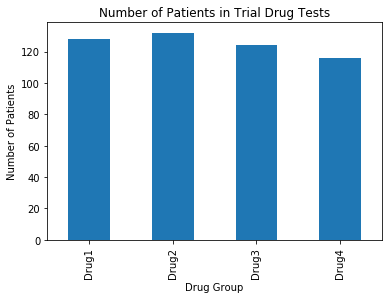

In [19]:
#Create the figure and axis
fig, ax = plt.subplots(1,1)

# Use the pd.Series.plot method to make the bar-plot
order = ['Drug1', 'Drug2', 'Drug3', 'Drug4']
pat_drug_counts.loc[order].plot(kind='bar', ax=ax)

# Add axes labels and a figure caption
ax.set(xlabel="Drug Group", ylabel="Number of Patients", title="Number of Patients in Trial Drug Tests")

__Are there an equal number of patients taking each drug?__

### Figure 1

__There is an equal of patients taking each drug.__ The number of patients taking each therapy was plotted as a bar-chart with the height indicating the number patients in each category.

# Drug Analysis

Using logical indexing isolate the intitial viral loads of the patients taking each drug and then plot the average viral load as a bar-chart.

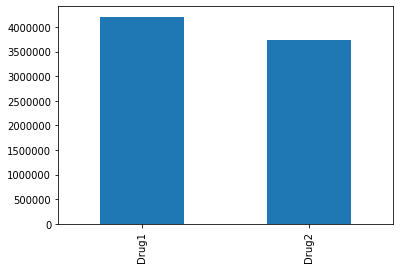

In [20]:
mask1 = pat_df['Drug'] == 'Drug1'
mask2 = pat_df['Drug'] == 'Drug2'

mu1 = pat_df.loc[mask1, 'Month0'].mean()
mu2 = pat_df.loc[mask2, 'Month0'].mean()

init_viral_mean = pd.Series([mu1, mu2], 
                            index=['Drug1', 'Drug2'])

fig, ax = plt.subplots(1,1)

init_viral_mean.plot(kind='bar', ax=ax)


Utilizing the same strategy create a plot that shows the average initial viral-loads and final viral loads of patients taking each drug. Use the left axis `init_ax` for the initial values and the right axis `final_ax` for the final viral loads. 

Adjust the `plt.subplots` command to synchronize the two y-axes.
Then:
  - Adjust the y-limits and the y-scale to be a log-scale
  - Use seaborn to despine the right and top axis lines
  - Give the y-axis a sensical label
  
After this scaling, _are the initial viral loads of patients comparable across treatments?_

Utilizing the subplot command. Create a figure that contains both of these plots. Synchronize overlapping axes. Write a figure caption describing the results of the figure.

Text(0.5, 1.0, 'Final Viral Load')

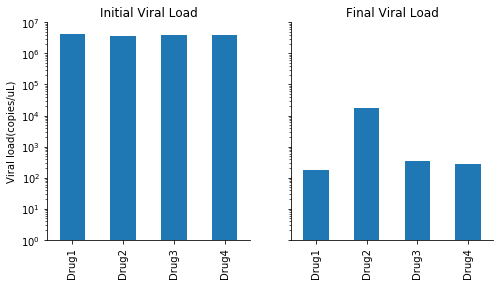

In [22]:
#Data Entry
drug1 = pat_df['Drug'] == 'Drug1'
drug2 = pat_df['Drug'] == 'Drug2'
drug3 = pat_df['Drug'] == 'Drug3'
drug4 = pat_df['Drug'] == 'Drug4'


drug1_init = pat_df.loc[drug1, 'Month0'].mean()
drug1_fin = pat_df.loc[drug1, 'Month4'].mean()
drug2_init = pat_df.loc[drug2, 'Month0'].mean()
drug2_fin = pat_df.loc[drug2, 'Month4'].mean()
drug3_init = pat_df.loc[drug3, 'Month0'].mean()
drug3_fin = pat_df.loc[drug3, 'Month4'].mean()
drug4_init = pat_df.loc[drug4, 'Month0'].mean()
drug4_fin = pat_df.loc[drug4, 'Month4'].mean()

#Plot the initial data M0
init_data = pd.Series([drug1_init, drug2_init, drug3_init, drug4_init], 
                            index=['Drug1', 'Drug2', 'Drug3', 'Drug4'])

fig, (init_ax, final_ax) = plt.subplots(1,2, figsize=(8, 4), sharey=True)

init_data.plot(kind='bar', ax=init_ax)

init_ax.set_yscale('log')

init_ax.set_title('Initial Viral Load')

init_ax.set_ylabel('Viral load(copies/uL)')

init_ax.set_ylim(1,1e7)

#Use seaborn to remove the top and right edge for both table

import seaborn

seaborn.despine(top = True, right = True)

#Plot the final data M4

final_data = pd.Series([drug1_fin, drug2_fin, drug3_fin, drug4_fin], 
                            index=['Drug1', 'Drug2', 'Drug3', 'Drug4'])


final_data.plot(kind='bar', ax=final_ax)

final_ax.set_title('Final Viral Load')

__Did we pick equally "sick" patients to take each drug? Did one drug perform better at reducing the viral load of patients?__

### Figure 2

The initial viral load shows that the patients were approximately equally "sick" to one another. However, looking at the final viral load, drug 2 did not perform better. Drug 1 performed slightly better than drug 3 and drug 4, but it is unknown if the difference is significant. 

# Trajectory Analysis

Using a for-loop, iterate through all rows of the `pat_df` Dataframe and plot the trajectory of the patient's viral load as an independent line. Use the `alpha` parameter of the plotting function to make each line transparent.

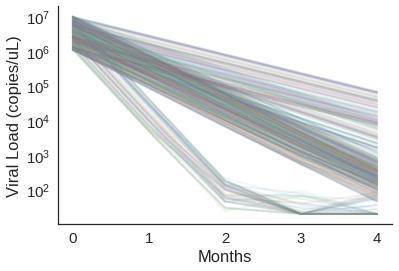

In [7]:
fig, ax = plt.subplots(1,1)

index = ['Month0', 'Month1', 'Month2', 'Month3', 'Month4']

for _, row in pat_df.iterrows():
    
    ax.plot(row[index].values, alpha=0.1)
    
ax.set_yscale('log')
ax.set_ylabel('Viral Load (copies/uL)')
ax.set_xlabel('Months')
sbn.despine(ax=ax)

Redo the figure above such that each drug plotted in a different color. Utilize a `dict` to define a color for each drug and then add that to the plotting arguement. Be sure to add axes labels as well as figure caption.

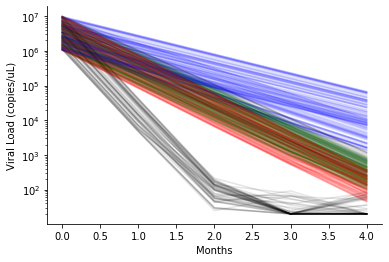

In [23]:
fig, ax = plt.subplots(1,1)

colorDict = {'Drug1' : 'Red',
             'Drug2' : 'Blue',
             'Drug3' : 'Green',
             'Drug4' : 'Black'}

index = ['Month0', 'Month1', 'Month2', 'Month3', 'Month4']

for _, row in pat_df.iterrows():
    colorLine = colorDict[row.Drug]
    ax.plot(row[index].values, color = colorLine, alpha=0.1)
    
ax.set_yscale('log')
ax.set_ylabel('Viral Load (copies/uL)')
ax.set_xlabel('Months')
sbn.despine(ax=ax)



__Is there a drug which reduces patient viral loads faster than others?__

### Figure 3

Drug 4 (Black Lines) showed a significant rapid decrease in viral load in comparison to the other drugs. 4 types of drug were tested over a 4 month period in determining a decrease in patient viral loads. While all drugs showed a general trend of decreasing viral loads, Drug 4 was able to depict a signficiant decrease in viral loads by 2 months rather than 4 months where Drug 1 (the second fastest) was able to match its decline.

# Age Specific Differences

Based on the mechanism of action of these drugs it is possible that they have an age dependent effect. Calculate the percentage change in the first month of the study for three different age ranges:
  - 18-30
  - 30-50
  - 50-70
  
  
Are there noticible difference between ages? Which drug would you suggest for each age-group?

In [24]:
# Creates a query in which patients that fits the criteria is storaged in the variable. 
# This  was done for each age range and drug. Afterwards, the mean function was used to 
# obtain the average value for each column of the excel file. This value was used for further 
# calculations. The average HIV RNA amount for Month0 and Month1 was used to calculate
# percent change for each drug. This was done for each age range and drug. 


# 18-30 range
age18_301= pat_df.query('Age <=30 & (Drug == "Drug1")')
age18_302= pat_df.query('Age <=30 & (Drug == "Drug2")')
age18_303= pat_df.query('Age <=30 & (Drug == "Drug3")')
age18_304= pat_df.query('Age <=30 & (Drug == "Drug4")')

bn1= age18_301.mean()
change1= (bn1[2]-bn1[1])/bn1[1]*100 # Percent change for Drug 1 

bn2= age18_302.mean()
change2= (bn2[2]-bn2[1])/bn2[1]*100 # Percent change for Drug 2

bn3= age18_303.mean()
change3= (bn3[2]-bn3[1])/bn3[1]*100 # Percent change for Drug 3

bn4= age18_304.mean()
change4= (bn4[2]-bn4[1])/bn4[1]*100 # Percent change for Drug 4

# 30-50 range
age30_501= pat_df.query('Age >=30 & Age <=50 &(Drug == "Drug1")')
age30_502= pat_df.query('Age >=30 & Age <=50 &(Drug == "Drug2")')
age30_503= pat_df.query('Age >=30 & Age <=50 &(Drug == "Drug3")')
age30_504= pat_df.query('Age >=30 & Age <=50 &(Drug == "Drug4")')

bn351= age30_501.mean()
change135= (bn351[2]-bn351[1])/bn351[1]*100

bn352= age30_502.mean()
change235= (bn352[2]-bn352[1])/bn352[1]*100

bn353= age30_503.mean()
change335= (bn353[2]-bn353[1])/bn353[1]*100

bn354= age30_504.mean()
change435= (bn354[2]-bn354[1])/bn354[1]*100

# 50-70 range
age50_701= pat_df.query('Age >=50 & Age<=70 & (Drug == "Drug1")')
age50_702= pat_df.query('Age >=50 & Age<=70 & (Drug == "Drug2")')
age50_703= pat_df.query('Age >=50 & Age<=70 & (Drug == "Drug3")')
age50_704= pat_df.query('Age >=50 & Age<=70 & (Drug == "Drug4")')

bn571= age50_701.mean()
change157= (bn571[2]-bn571[1])/bn571[1]*100

bn572= age50_702.mean()
change257= (bn572[2]-bn572[1])/bn572[1]*100

bn573= age50_703.mean()
change357= (bn573[2]-bn573[1])/bn573[1]*100

bn574= age50_704.mean()
change457= (bn574[2]-bn574[1])/bn574[1]*100

# Creates a string that contains the percent change from each drug according to age range. 

Drug1= [change1, change135, change157]
Drug2= [change2, change235, change257]
Drug3= [change3, change335, change357]
Drug4= [change4, change435, change457]

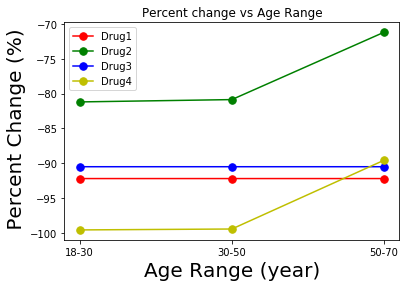

In [25]:
yvals= ['18-30', '30-50', '50-70'] # X-axis age range

fig, ax = plt.subplots(1,1) # Creates plot 

# Plots percent change for Drug over age range in a different color and increase
# the size of the mark.
ax.plot(yvals, Drug1,
       color = 'r', label = 'Drug1',
        marker = '.', markersize = 15)
ax.plot(yvals, Drug2,
       color = 'g', label = 'Drug2',
        marker = '.', markersize = 15)
ax.plot(yvals, Drug3,
       color = 'b', label = 'Drug3',
        marker = '.', markersize = 15)
ax.plot(yvals, Drug4,
       color = 'y', label = 'Drug4',
        marker = '.', markersize = 15)

# Label the axis and tile
ax.set_title ('Percent change vs Age Range')
ax.set_xlabel ('Age Range (year)', fontsize=20)
ax.set_ylabel (' Percent Change (%)', fontsize=20)

# Increases the font size of the legend
ax.legend(fontsize=10)